In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# x array
x = np.linspace(-10, 10, 200)

In [ ]:
# Plot function
def plot_function(x, y, title):
  plt.plot(x, y, label=title)
  plt.title(title)
  plt.show()

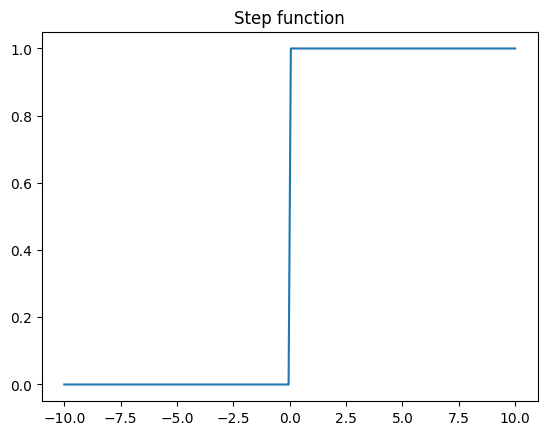

In [ ]:
# Step function
def step(x):
  return np.where(x < 0, 0, 1)

plot_function(x, step(x), "Step function")

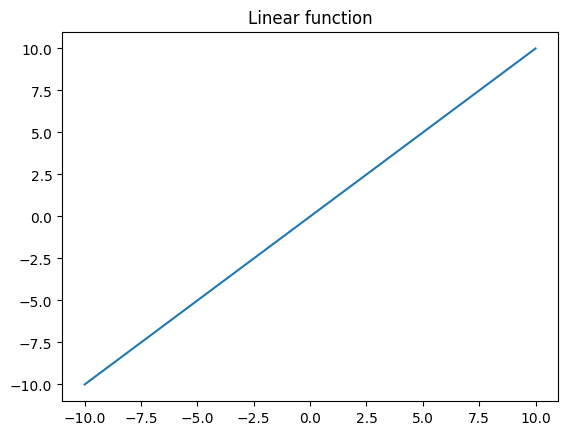

In [ ]:
# Linear function
def linear(x):
  return x

plot_function(x, linear(x), "Linear function")

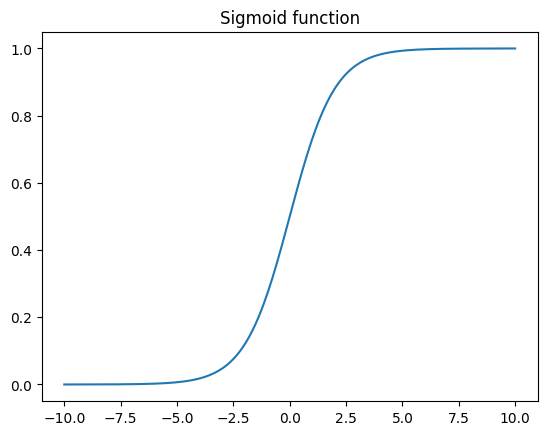

In [ ]:
# Sigmoid function
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

plot_function(x, sigmoid(x), "Sigmoid function")

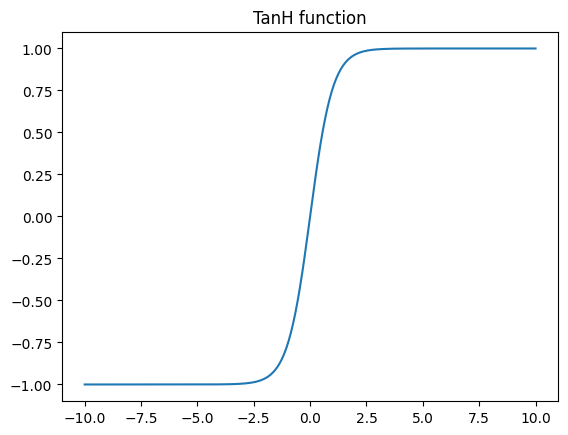

In [ ]:
# TanH function
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

plot_function(x, tanh(x), "TanH function")

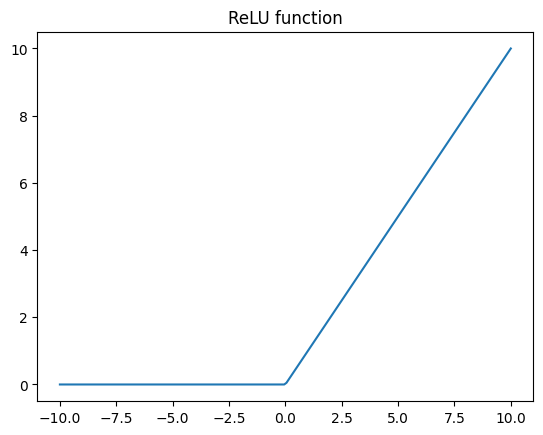

In [ ]:
# ReLU function
def relu(x):
  return np.maximum(0, x)

plot_function(x, relu(x), "ReLU function")

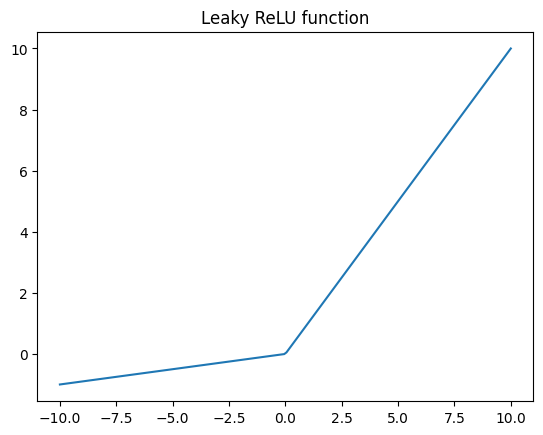

In [ ]:
# Leaky ReLU function
def leaky_relu(x):
  alpha = 0.1
  return np.maximum(alpha * x, x)

plot_function(x, leaky_relu(x), "Leaky ReLU function")

In [ ]:
# Softmax function
def softmax(x):
  e1 = np.exp(x - np.max(x))
  return e1 / np.sum(e1, axis=0)

z = np.array([0.90, 0.40, 0.10])
softmax(z)

array([0.48641453, 0.29502533, 0.21856014])

## Design AND, OR, NOT, NAND, NOR, XOR, XNOR gates. Identify the values of W1, W2, b and sigma.

**Linear Transformation formula for two inputs neuron:** z = x1 * W1 + x2 * W2 + b

In [ ]:
# Linear Transformation --> Activation function

def activation_function(x1, x2, w1, w2, b, func):
  # Linear transformation
  z = x1 * w1 + x2 * w2 + b

  # Activation functions
  match func:
    case "step":
      return np.where(z < 0, 0, 1)
    case "linear":
      return z
    case "sigmoid":
      return 1 / (1 + np.exp(-z))
    case "tanh":
      return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    case "relu":
      return np.maximum(0, z)
    case "leaky_relu":
      alpha = 0.1
      return np.maximum(alpha * z, z)
    case "softmax":
      return np.exp(z) / np.sum(np.exp(z), axis=0)


Design AND gate

In [ ]:
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
w1 = 1
w2 = 1
b = -2
func = "step"
activation_function(x1, x2, w1, w2, b, func)

array([0, 0, 0, 1])

Design OR gate

In [ ]:
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
w1 = 1
w2 = 1
b = -1
func = "step"
activation_function(x1, x2, w1, w2, b, func)

array([0, 1, 1, 1])

Design NOT gate

In [ ]:
x1 = np.array([0, 1])
x2 = np.array([0, 0])
w1 = -1
w2 = 0
b = 1
func = "linear"
activation_function(x1, x2, w1, w2, b, func)

array([1, 0])

Design NAND gate

In [ ]:
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
w1 = -1
w2 = -1
b = 1
func = "step"
activation_function(x1, x2, w1, w2, b, func)

array([1, 1, 1, 0])

Design NOR gate

In [ ]:
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
w1 = -1
w2 = -1
b = 0
func = "step"
activation_function(x1, x2, w1, w2, b, func)

array([1, 0, 0, 0])

Design XOR gate

In [ ]:
# XOR = (x1 OR x2) AND (x1 NAND x2)
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
func = "step"

# Make array of size 3 with the parameters w1, w2, b
or_param = [1, 1, -1]
nand_param = [-1, -1, 1]
and_param = [1, 1, -2]

# Calculate x1 OR x2
x1_or_x2 = activation_function(x1, x2, or_param[0], or_param[1], or_param[2], func)
# Calculate x1 NAND x2
x1_nand_x2 = activation_function(x1, x2, nand_param[0], nand_param[1], nand_param[2], func)
# Calculate XOR = (x1 OR x2) AND (x1 NAND x2)
xor = activation_function(x1_or_x2, x1_nand_x2, and_param[0], and_param[1], and_param[2], func)
xor

array([0, 1, 1, 0])

Design XNOR gate

In [ ]:
# XNOR = (x1 AND x2) OR (x1 NOR x2)
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
func = "step"

# Make array of size 3 with the parameters w1, w2, b
and_param = [1, 1, -2]
nor_param = [-1, -1, 0]
or_param = [1, 1, -1]

# Calculate x1 AND x2
x1_and_x2 = activation_function(x1, x2, and_param[0], and_param[1], and_param[2], func)
# Calculate x1 NOR x2
x1_nor_x2 = activation_function(x1, x2, nor_param[0], nor_param[1], nor_param[2], func)
# Calculate XOR = (x1 AND x2) OR (x1 NOR x2)
xnor = activation_function(x1_and_x2, x1_nor_x2, or_param[0], or_param[1], or_param[2], func)
xnor

array([1, 0, 0, 1])